# Multiple Inheritance (revisit chapter 3)


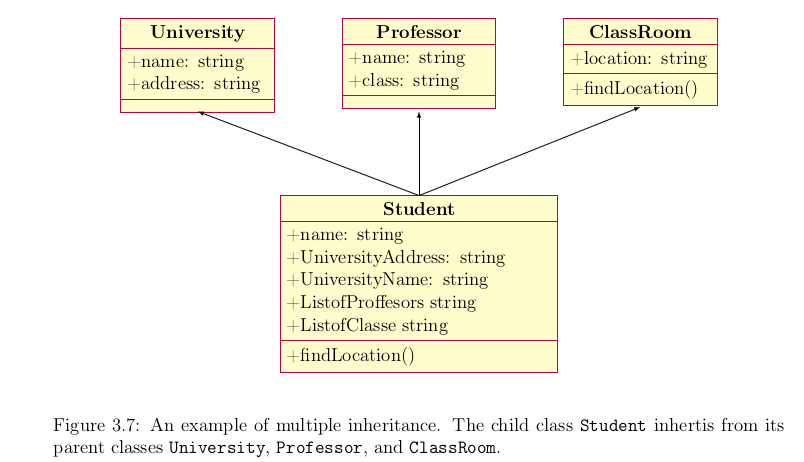

In [8]:
# Ejemplo:
class Merchandise:

    def __init__(self, number, cost):
        self.number = number
        self.cost = cost
        return


    def computeTotalCost(self):
        total = self.number*self.cost
        return total

class Fruit:

    def __init__(self, name):
        self.name = name

class Item(Merchandise, Fruit): # multiple inheritance
    def __init__(self, name, number, cost):
        Fruit.__init__(self, name)
        Merchandise.__init__(self, number, cost)
        return

orange = Item("Orange", 300, 23.5)
orange.__dict__

    


{'name': 'Orange', 'number': 300, 'cost': 23.5}

In [9]:
orange.computeTotalCost()

7050.0

## Problema del diamante. 
La herencia multiple puede acarrear problemas como los que se van a exponer en esta clase. De hecho Java no usa herencia multiple, por esta, y tal vez otras razones.

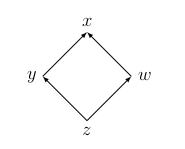

Vamos a implementar el siguiente modelo
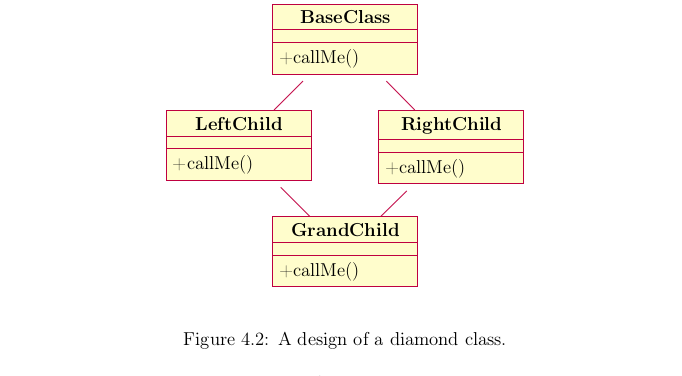


In [12]:
# base class
class BaseClass:
    countBase = 0 # to count calls
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0 
    def callMe(self):
        BaseClass.callMe(self)
        print("called from left child")
        self.countLeft +=1
        return

class RightChild(BaseClass):
    countRight = 0 
    def callMe(self):
        BaseClass.callMe(self)
        print("called from right child")
        self.countRight +=1
        return

class GrandChild(LeftChild, RightChild):
    countGrand = 0
    def callMe(self):
        LeftChild.callMe(self)
        RightChild.callMe(self)
        print("called from grand child")
        self.countGrand +=1
        return

In [13]:
granC = GrandChild()
granC.callMe()

called from base class
called from left child
called from base class
called from right child
called from grand child


Un problema en este codigo es que la clase base ```BaseClass``` se llama dos veces. Como podemos evitar esto?


In [16]:
# base class
class BaseClass:
    countBase = 0 # to count calls
    def callMe(self):
        print("called from base class")
        self.countBase += 1
        return

class LeftChild(BaseClass):
    countLeft = 0 
    def callMe(self):
        super().callMe()
        print("called from left child")
        self.countLeft +=1
        return

class RightChild(BaseClass):
    countRight = 0 
    def callMe(self):
        super().callMe()
        print("called from right child")
        self.countRight +=1
        return

class GrandChild(LeftChild, RightChild):
    countGrand = 0
    def callMe(self):
        super().callMe()
        
        print("called from grand child")
        self.countGrand +=1
        return

In [17]:
granC = GrandChild()
granC.callMe()

called from base class
called from right child
called from left child
called from grand child


Voy a explicar el MRO: Multiresolution order

In [20]:
from types import resolve_bases
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return   


class D(B,C):
    def callMe(self):
        super().callMe()
        print("D")
        return



In [21]:
myD = D()
myD.callMe()

A
C
B
D


In [22]:
help(D)

Help on class D in module __main__:

class D(B, C)
 |  Method resolution order:
 |      D
 |      B
 |      C
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



Si quisieramos que el orden fuese A,B,C,D, intercambiamos
los "hijos"

In [23]:
from types import resolve_bases
class A():
    def callMe(self):
        print("A")
        return

class B(A):
    def callMe(self):
        super().callMe()
        print("B")
        return

class C(A):
    def callMe(self):
        super().callMe()
        print("C")
        return   


class D(C,B):
    def callMe(self):
        super().callMe()
        print("D")
        return



In [24]:
myD = D()
myD.callMe()

A
B
C
D


In [25]:
help(myD)

Help on D in module __main__ object:

class D(C, B)
 |  Method resolution order:
 |      D
 |      C
 |      B
 |      A
 |      builtins.object
 |  
 |  Methods defined here:
 |  
 |  callMe(self)
 |  
 |  ----------------------------------------------------------------------
 |  Data descriptors inherited from A:
 |  
 |  __dict__
 |      dictionary for instance variables (if defined)
 |  
 |  __weakref__
 |      list of weak references to the object (if defined)



# Polimorfismo

Polimorfismo significa "diferences formas". Ya hablamos de esto en el capitulo 2. Sirve para "reciclar" codigo.

Hay varias formas de polimorfismo. En esta clase estudiamos

* Override (ya la vimos pero la repasamos)
* Overload

## Override. 
Simplemente es un metodo que cambia de acuerdo a la case de donde se llame. 

Veamos un ejemplo con animales

In [27]:
class Animal:

    def __init__(self, name):
        self.name = name
        return

    def move(self):
        print("I %s am moving\n"%self.name)
        return

class Fish(Animal):

    def move(self):
        print(f" I am a {self.name} and I swim")
        return

class Snake(Animal):

    def move(self):
        print(f"I am a {self.name} and I crawl")
        return 

myFish = Fish("fish")
myFish.__dict__

{'name': 'fish'}

In [28]:
myFish.move()

 I am a fish and I swim


In [29]:
mySnake = Snake("snake")
mySnake.move()

I am a snake and I crawl
